# Covid-19
#### disease (COVID-19) is an infectious disease caused by the SARS-CoV-2 virus.
#### Most people who fall sick with COVID-19 will experience mild to moderate symptoms and recover without special treatment. However, some will become seriously ill and require medical attention.
#### The virus can spread from an infected person’s mouth or nose in small liquid particles when they cough, sneeze, speak, sing or breathe. These particles range from larger respiratory droplets to smaller aerosols.
#### You can be infected by breathing in the virus if you are near someone who has COVID-19, or by touching a contaminated surface and then your eyes, nose or mouth. The virus spreads more easily indoors and in crowded settings.


In [1]:
import numpy as np
import scipy.stats 
import pandas as pd
import matplotlib.pyplot as plt
import pandas.plotting
from IPython import display
from ipywidgets import interact,widgets 
%matplotlib inline
import re
import mailbox
import csv
import seaborn as sns

In [2]:
data=pd.read_csv("/Users/sakshiashutosh/Downloads/COVID-19 Coronavirus.csv")

In [3]:
data

,Country,Other names,ISO 3166-1 alpha-3 CODE,Population,Continent,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
0,Afghanistan,Afghanistan,AFG,40462186,Asia,177827,7671,4395,190,4.313743
1,Albania,Albania,ALB,2872296,Europe,273870,3492,95349,1216,1.275058
2,Algeria,Algeria,DZA,45236699,Africa,265691,6874,5873,152,2.587216
3,Andorra,Andorra,AND,77481,Europe,40024,153,516565,1975,0.382271
4,Angola,Angola,AGO,34654212,Africa,99194,1900,2862,55,1.915438
...,...,...,...,...,...,...,...,...,...,...
220,Wallis and Futuna,Wallis and Futuna Islands,WLF,10894,Oceania,454,7,41674,643,1.541850
221,Western Sahara,Western Sahara,ESHÂ,623031,Africa,10,1,16,2,10.000000
222,Yemen,Yemen,YEM,30975258,Asia,11806,2143,381,69,18.151787
223,Zambia,Zambia,ZMB,19284482,Africa,317076,3967,16442,206,1.251120


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country                  225 non-null    object 
 1   Other names              224 non-null    object 
 2   ISO 3166-1 alpha-3 CODE  225 non-null    object 
 3   Population               225 non-null    int64  
 4   Continent                225 non-null    object 
 5   Total Cases              225 non-null    int64  
 6   Total Deaths             225 non-null    int64  
 7   Tot Cases//1M pop        225 non-null    int64  
 8   Tot Deaths/1M pop        225 non-null    int64  
 9   Death percentage         225 non-null    float64
dtypes: float64(1), int64(5), object(4)
memory usage: 17.7+ KB


In [5]:
data.describe()

,Population,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
count,2.250000e+02,2.250000e+02,2.250000e+02,225.000000,225.000000,225.000000
mean,3.507321e+07,2.184781e+06,2.744813e+04,136900.373333,1096.715556,1.444125
std,1.392418e+08,7.275938e+06,9.689177e+04,145060.340289,1195.715543,1.741728
min,8.050000e+02,1.000000e+00,0.000000e+00,9.000000,0.000000,0.000000
25%,5.665570e+05,2.407100e+04,1.890000e+02,11384.000000,123.000000,0.511291
50%,5.827911e+06,1.639360e+05,1.965000e+03,88987.000000,708.000000,1.036905
75%,2.190585e+07,1.092547e+06,1.366000e+04,223335.000000,1795.000000,1.977017
max,1.439324e+09,8.183905e+07,1.008222e+06,696044.000000,6286.000000,18.151787


In [6]:
data.columns.tolist()

['Country',
 'Other names',
 'ISO 3166-1 alpha-3 CODE',
 'Population',
 'Continent',
 'Total Cases',
 'Total Deaths',
 'Tot\xa0Cases//1M pop',
 'Tot\xa0Deaths/1M pop',
 'Death percentage']

In [7]:
data.rename(columns={"Other names":"other_names","ISO 3166-1 alpha-3 CODE":"country_code","Total Cases":"total_case",
                    "Total Deaths":"total_deaths","Tot\xa0Cases//1M pop":"total_case_per_1M_pop",
                    "Tot\xa0Deaths/1M pop":"total_death_per_1M_pop","Death percentage":"death_percent"},inplace=True)

In [8]:
data

,Country,other_names,country_code,Population,Continent,total_case,total_deaths,total_case_per_1M_pop,total_death_per_1M_pop,death_percent
0,Afghanistan,Afghanistan,AFG,40462186,Asia,177827,7671,4395,190,4.313743
1,Albania,Albania,ALB,2872296,Europe,273870,3492,95349,1216,1.275058
2,Algeria,Algeria,DZA,45236699,Africa,265691,6874,5873,152,2.587216
3,Andorra,Andorra,AND,77481,Europe,40024,153,516565,1975,0.382271
4,Angola,Angola,AGO,34654212,Africa,99194,1900,2862,55,1.915438
...,...,...,...,...,...,...,...,...,...,...
220,Wallis and Futuna,Wallis and Futuna Islands,WLF,10894,Oceania,454,7,41674,643,1.541850
221,Western Sahara,Western Sahara,ESHÂ,623031,Africa,10,1,16,2,10.000000
222,Yemen,Yemen,YEM,30975258,Asia,11806,2143,381,69,18.151787
223,Zambia,Zambia,ZMB,19284482,Africa,317076,3967,16442,206,1.251120


## Country vs Country's Population

### Low Population

In [10]:
data.Population.sort_values(ascending=True).head(10)

217      805
148     1645
67      3657
136     4997
172     5744
168     6109
191     9930
220    10894
5      15237
46     17592
Name: Population, dtype: int64

In [12]:
low_pop=data.loc[[217,148,67,136,172,168,191,220,5,46]]

In [14]:
low_pop

,Country,other_names,country_code,Population,Continent,total_case,total_deaths,total_case_per_1M_pop,total_death_per_1M_pop,death_percent
217,Vatican City,Holy See,VAT,805,Europe,29,0,36025,0,0.000000
148,Niue,Niue,NIU,1645,Oceania,7,0,4255,0,0.000000
67,Falkland Islands,Falkland Islands (Malvinas),FLK,3657,Latin America and the Caribbean,123,0,33634,0,0.000000
136,Montserrat,Montserrat,MSR,4997,Latin America and the Caribbean,175,2,35021,400,1.142857
172,Saint Pierre Miquelon,Saint Pierre and Miquelon,SPM,5744,Northern America,1957,1,340703,174,0.051099
168,Saint Helena,Saint Helena,SHN,6109,Africa,2,0,327,0,0.000000
191,St. Barth,Saint Barthélemy,BLM,9930,Latin America and the Caribbean,4150,6,417925,604,0.144578
220,Wallis and Futuna,Wallis and Futuna Islands,WLF,10894,Oceania,454,7,41674,643,1.541850
5,Anguilla,Anguilla,AIA,15237,Latin America and the Caribbean,2700,9,177200,591,0.333333
46,Cook Islands,Cook Islands,COK,17592,Oceania,2118,0,120396,0,0.000000


/Users/sakshiashutosh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


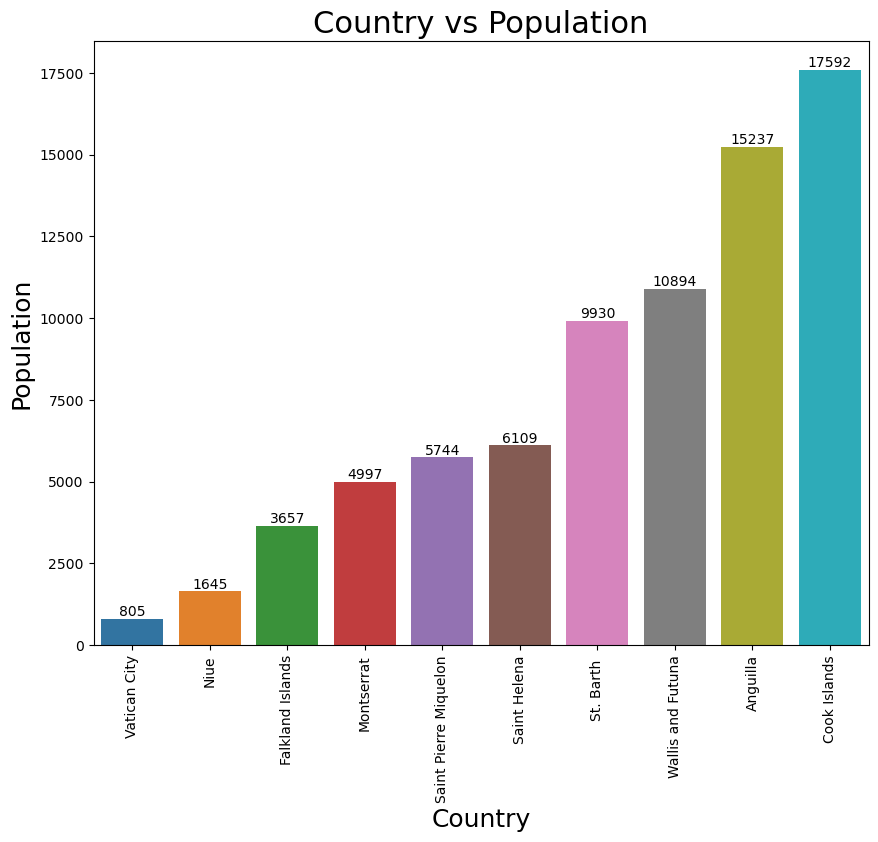

In [16]:
plt.figure(figsize=(10,8),dpi=100)
ax=sns.barplot(low_pop.Country,low_pop.Population)
plt.xticks(rotation=90)
plt.xlabel("Country",fontsize=18)
plt.ylabel("Population",fontsize=18)
plt.title("Country vs Population",fontsize=22)
for i in ax.containers:
    ax.bar_label(i)
plt.show()

/Users/sakshiashutosh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


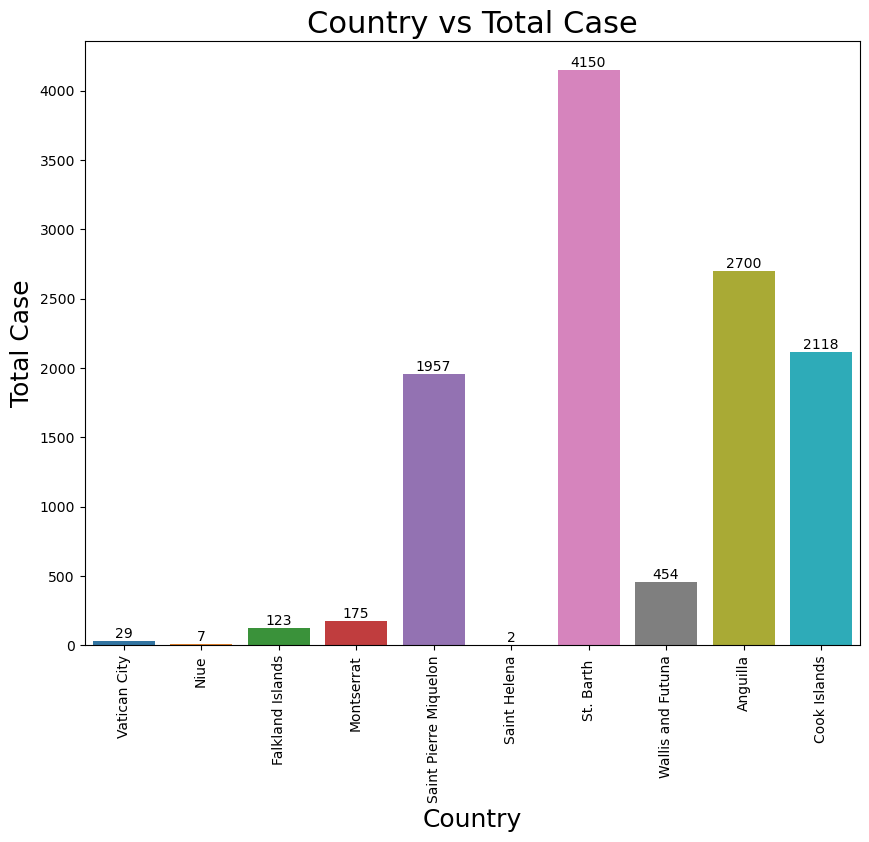

In [19]:
plt.figure(figsize=(10,8),dpi=100)
ax=sns.barplot(low_pop.Country,low_pop.total_case)
plt.xticks(rotation=90)
plt.xlabel("Country",fontsize=18)
plt.ylabel("Total Case",fontsize=18)
plt.title("Country vs Total Case",fontsize=22)
for i in ax.containers:
    ax.bar_label(i)
plt.show()

In [18]:
low_pop.columns

Index(['Country', 'other_names', 'country_code', 'Population', 'Continent',
       'total_case', 'total_deaths', 'total_case_per_1M_pop',
       'total_death_per_1M_pop', 'death_percent'],
      dtype='object')

/Users/sakshiashutosh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


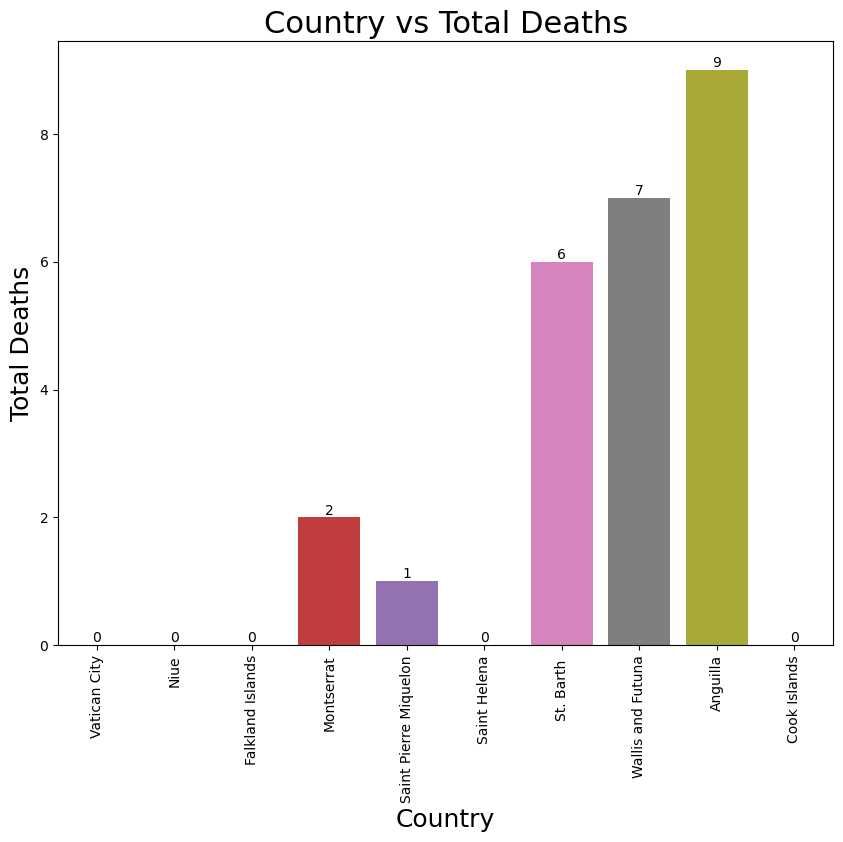

In [20]:
plt.figure(figsize=(10,8),dpi=100)
ax=sns.barplot(low_pop.Country,low_pop.total_deaths)
plt.xticks(rotation=90)
plt.xlabel("Country",fontsize=18)
plt.ylabel("Total Deaths",fontsize=18)
plt.title("Country vs Total Deaths",fontsize=22)
for i in ax.containers:
    ax.bar_label(i)
plt.show()

/Users/sakshiashutosh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


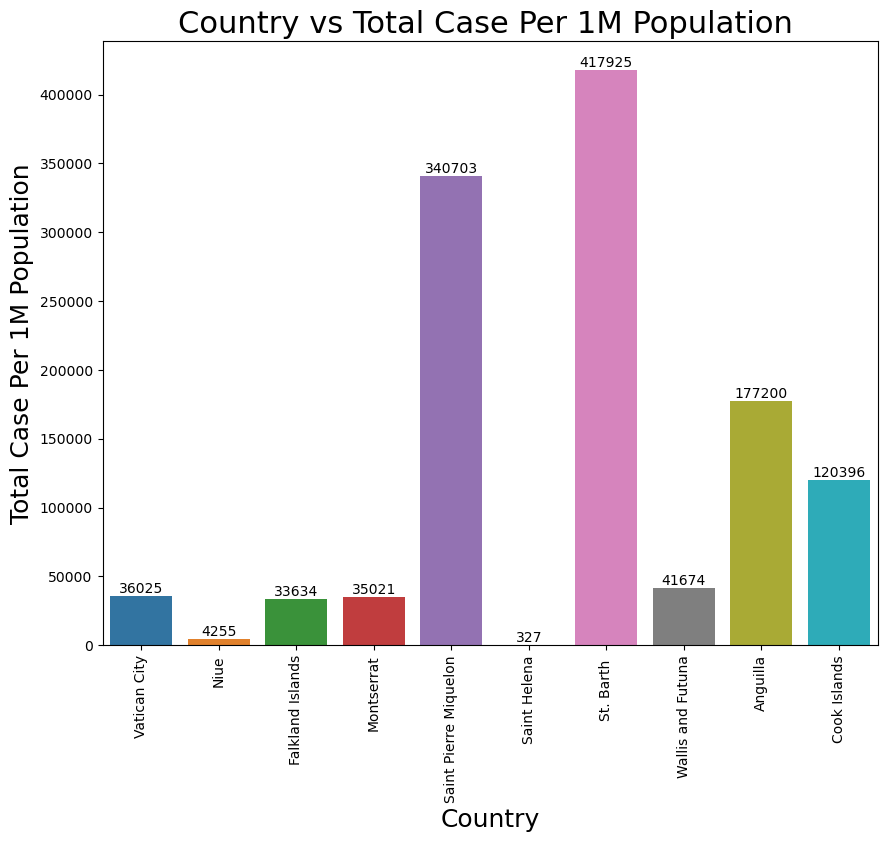

In [21]:
plt.figure(figsize=(10,8),dpi=100)
ax=sns.barplot(low_pop.Country,low_pop.total_case_per_1M_pop)
plt.xticks(rotation=90)
plt.xlabel("Country",fontsize=18)
plt.ylabel("Total Case Per 1M Population",fontsize=18)
plt.title("Country vs Total Case Per 1M Population ",fontsize=22)
for i in ax.containers:
    ax.bar_label(i)
plt.show()

/Users/sakshiashutosh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


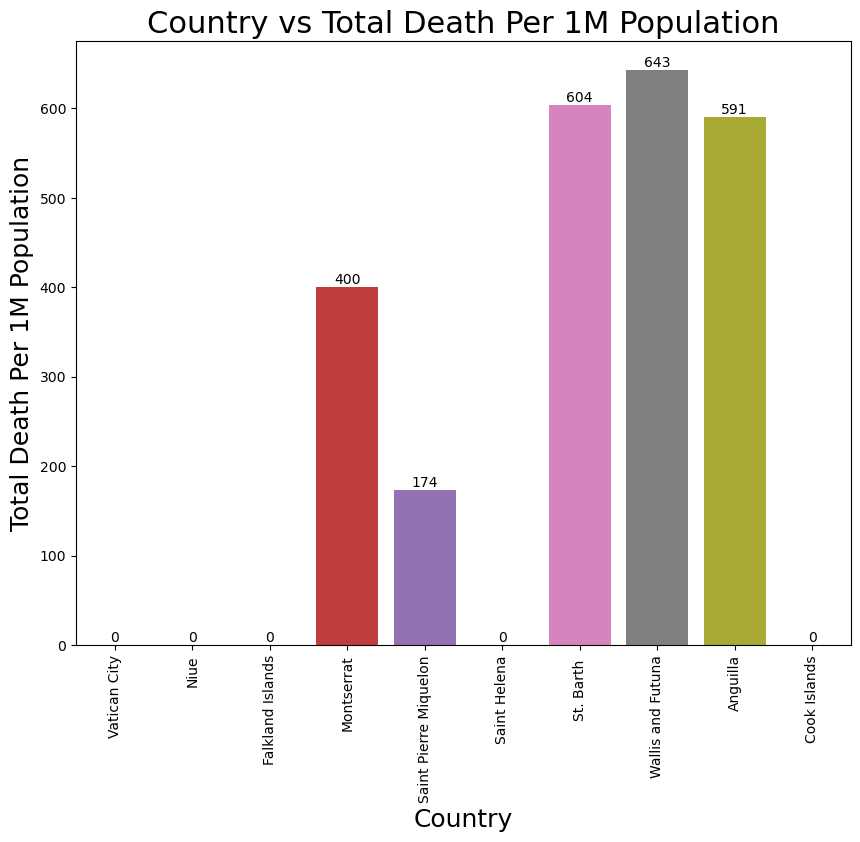

In [22]:
plt.figure(figsize=(10,8),dpi=100)
ax=sns.barplot(low_pop.Country,low_pop.total_death_per_1M_pop)
plt.xticks(rotation=90)
plt.xlabel("Country",fontsize=18)
plt.ylabel("Total Death Per 1M Population",fontsize=18)
plt.title("Country vs Total Death Per 1M Population",fontsize=22)
for i in ax.containers:
    ax.bar_label(i)
plt.show()

/Users/sakshiashutosh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


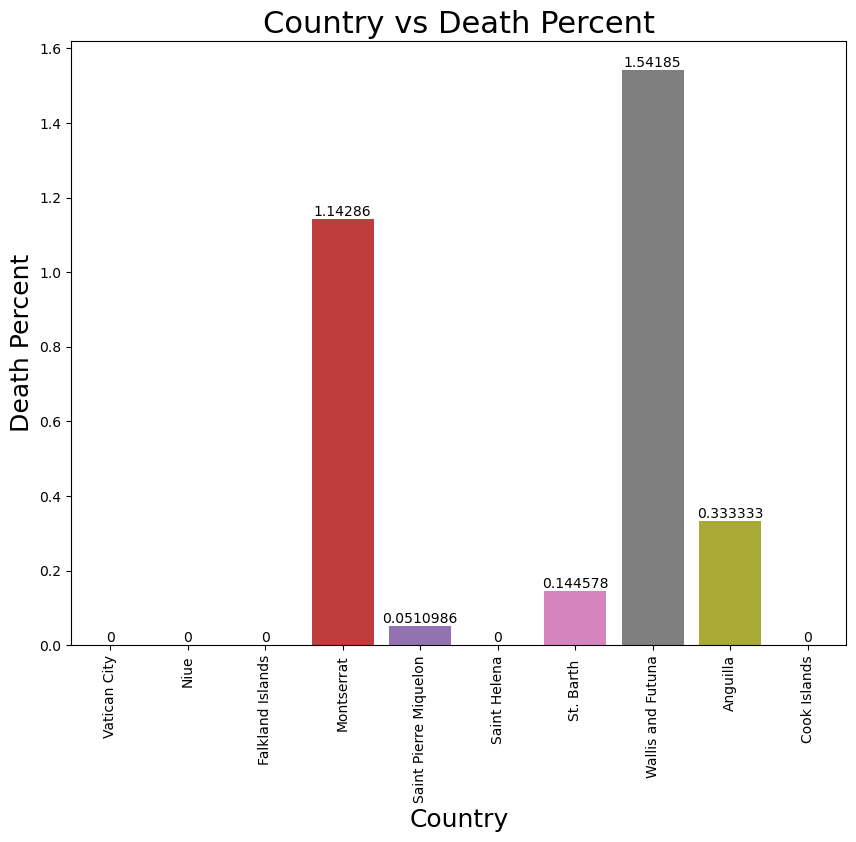

In [24]:
plt.figure(figsize=(10,8),dpi=100)
ax=sns.barplot(low_pop.Country,low_pop.death_percent)
plt.xticks(rotation=90)
plt.xlabel("Country",fontsize=18)
plt.ylabel("Death Percent",fontsize=18)
plt.title("Country vs Death Percent",fontsize=22)
for i in ax.containers:
    ax.bar_label(i)
plt.show()

### High Population

In [25]:
data.Population.sort_values(ascending=True).tail(10)

130     131303955
165     146044010
15      167561502
147     215077352
26      215204501
152     228397520
93      278586508
214     334400597
92     1403754381
42     1439323776
Name: Population, dtype: int64

In [26]:
high_pop=data.loc[[130,165,15,147,26,152,93,214,92,42]]

In [27]:
high_pop

,Country,other_names,country_code,Population,Continent,total_case,total_deaths,total_case_per_1M_pop,total_death_per_1M_pop,death_percent
130,Mexico,Mexico,MEX,131303955,Latin America and the Caribbean,5665376,323212,43147,2462,5.705041
165,Russia,Russian Federation,RUS,146044010,Europe,17896866,369708,122544,2531,2.065770
15,Bangladesh,Bangladesh,BGD,167561502,Asia,1951770,29122,11648,174,1.492082
147,Nigeria,Nigeria,NGA,215077352,Africa,255468,3142,1188,15,1.229900
26,Brazil,Brazil,BRA,215204501,Latin America and the Caribbean,29999816,660269,139401,3068,2.200910
152,Pakistan,Pakistan,PAK,228397520,Asia,1525466,30361,6679,133,1.990277
93,Indonesia,Indonesia,IDN,278586508,Asia,6019981,155288,21609,557,2.579543
214,USA,United States of America,USA,334400597,Northern America,81839052,1008222,244734,3015,1.231957
92,India,India,IND,1403754381,Asia,43029044,521388,30653,371,1.211712
42,China,China,CHN,1439323776,Asia,154738,4638,108,3,2.997325


/Users/sakshiashutosh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


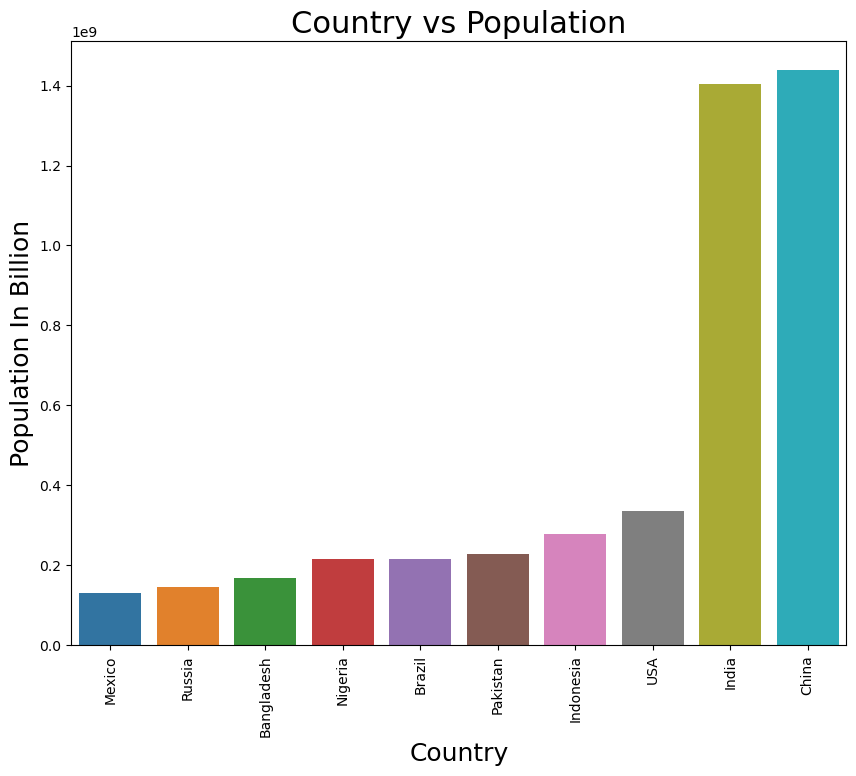

In [33]:
plt.figure(figsize=(10,8),dpi=100)
ax=sns.barplot(high_pop.Country,high_pop.Population)
plt.xticks(rotation=90)
plt.xlabel("Country",fontsize=18)
plt.ylabel("Population In Billion",fontsize=18)
plt.title("Country vs Population",fontsize=22)
plt.show()

/Users/sakshiashutosh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


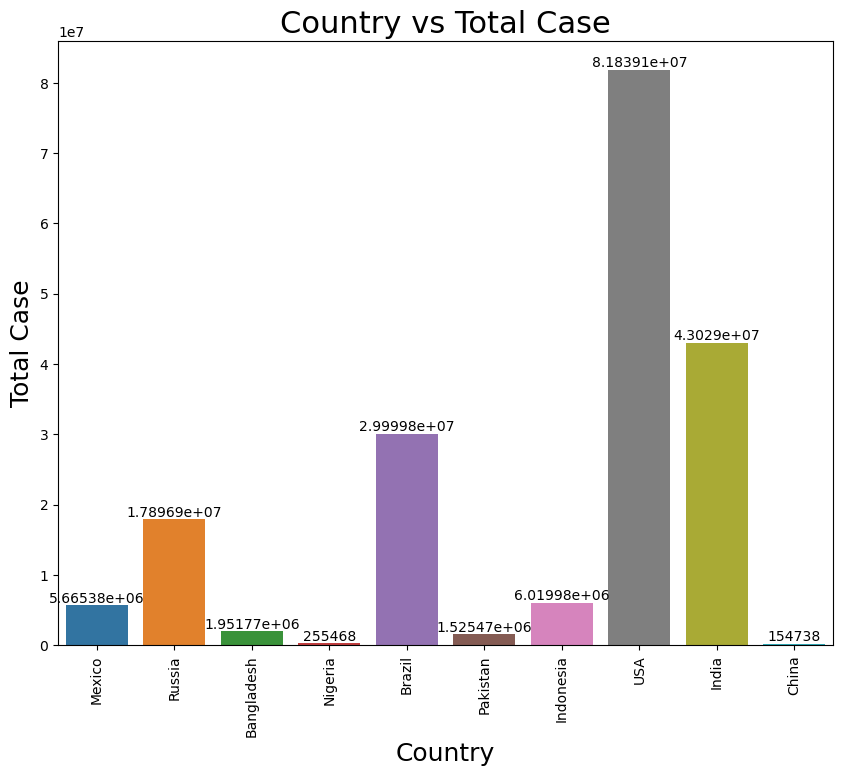

In [34]:
plt.figure(figsize=(10,8),dpi=100)
ax=sns.barplot(high_pop.Country,high_pop.total_case)
plt.xticks(rotation=90)
plt.xlabel("Country",fontsize=18)
plt.ylabel("Total Case",fontsize=18)
plt.title("Country vs Total Case",fontsize=22)
for i in ax.containers:
    ax.bar_label(i)
plt.show()

/Users/sakshiashutosh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


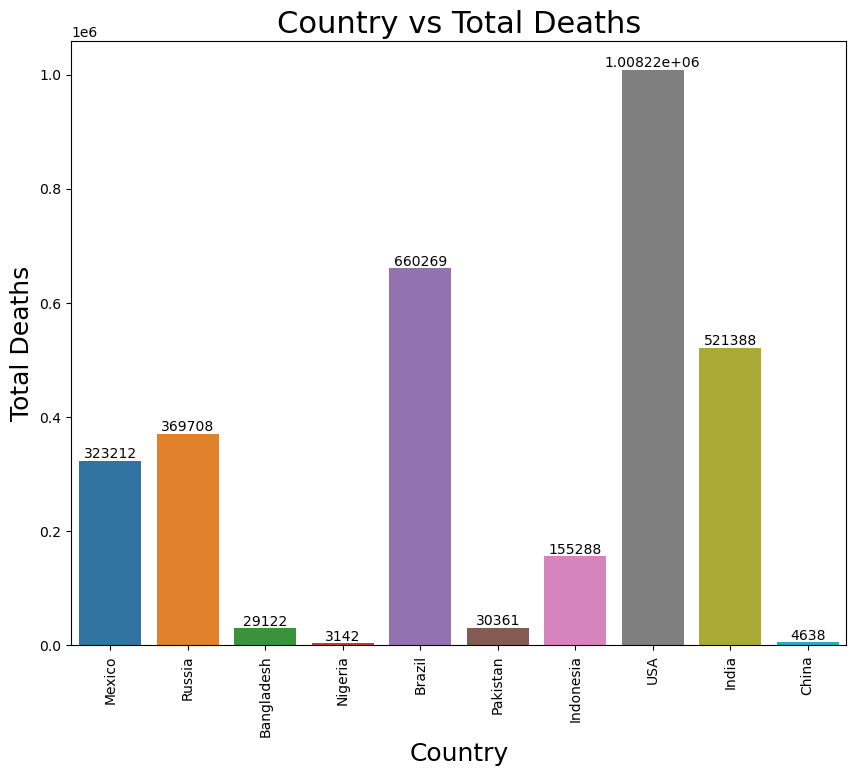

In [35]:
plt.figure(figsize=(10,8),dpi=100)
ax=sns.barplot(high_pop.Country,high_pop.total_deaths)
plt.xticks(rotation=90)
plt.xlabel("Country",fontsize=18)
plt.ylabel("Total Deaths",fontsize=18)
plt.title("Country vs Total Deaths",fontsize=22)
for i in ax.containers:
    ax.bar_label(i)
plt.show()

/Users/sakshiashutosh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


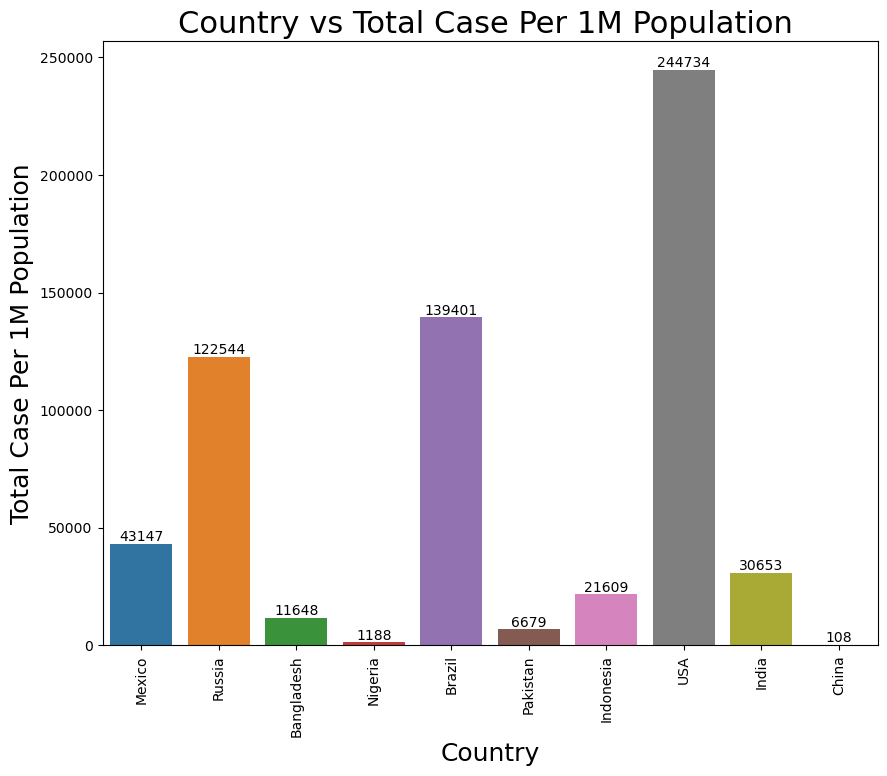

In [36]:
plt.figure(figsize=(10,8),dpi=100)
ax=sns.barplot(high_pop.Country,high_pop.total_case_per_1M_pop)
plt.xticks(rotation=90)
plt.xlabel("Country",fontsize=18)
plt.ylabel("Total Case Per 1M Population",fontsize=18)
plt.title("Country vs Total Case Per 1M Population ",fontsize=22)
for i in ax.containers:
    ax.bar_label(i)
plt.show()

/Users/sakshiashutosh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


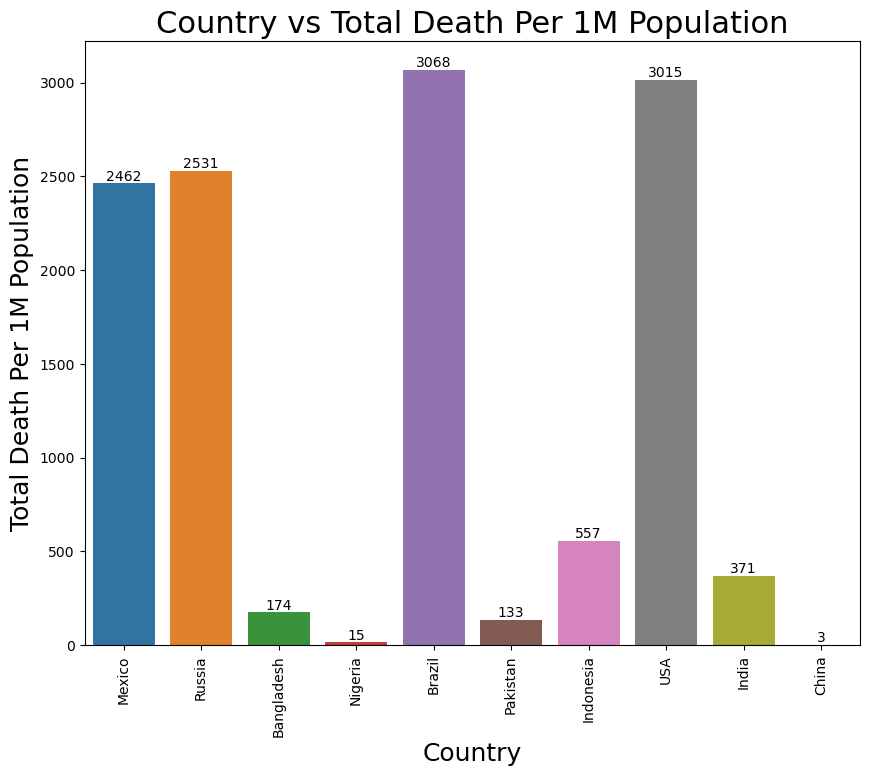

In [37]:
plt.figure(figsize=(10,8),dpi=100)
ax=sns.barplot(high_pop.Country,high_pop.total_death_per_1M_pop)
plt.xticks(rotation=90)
plt.xlabel("Country",fontsize=18)
plt.ylabel("Total Death Per 1M Population",fontsize=18)
plt.title("Country vs Total Death Per 1M Population",fontsize=22)
for i in ax.containers:
    ax.bar_label(i)
plt.show()

/Users/sakshiashutosh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


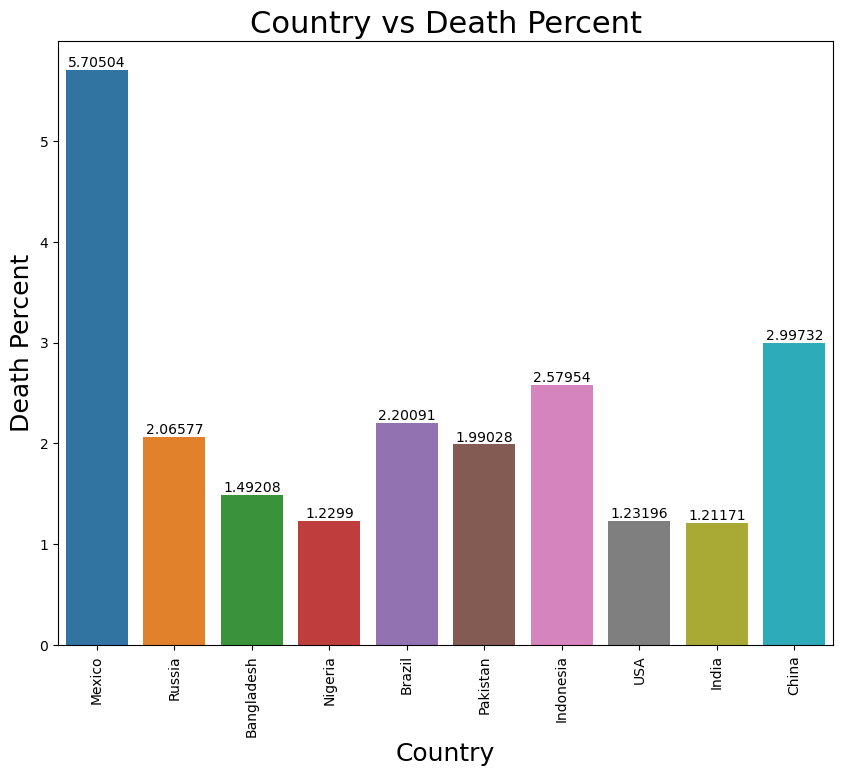

In [38]:
plt.figure(figsize=(10,8),dpi=100)
ax=sns.barplot(high_pop.Country,high_pop.death_percent)
plt.xticks(rotation=90)
plt.xlabel("Country",fontsize=18)
plt.ylabel("Death Percent",fontsize=18)
plt.title("Country vs Death Percent",fontsize=22)
for i in ax.containers:
    ax.bar_label(i)
plt.show()

## Country vs Total Case

### For Less Number Of Case

In [40]:
data.total_case.sort_values(ascending =True).head(10)

131      1
168      2
148      7
125      7
221     10
217     29
118     82
67     123
136    175
220    454
Name: total_case, dtype: int64

In [41]:
low_case=data.loc[[131,168,148,125,221,217,118,67,136,220]]

In [42]:
low_case

,Country,other_names,country_code,Population,Continent,total_case,total_deaths,total_case_per_1M_pop,total_death_per_1M_pop,death_percent
131,Micronesia,Micronesia (Federated States of),FSM,117134,Oceania,1,0,9,0,0.000000
168,Saint Helena,Saint Helena,SHN,6109,Africa,2,0,327,0,0.000000
148,Niue,Niue,NIU,1645,Oceania,7,0,4255,0,0.000000
125,Marshall Islands,Marshall Islands,MHL,59889,Oceania,7,0,117,0,0.000000
221,Western Sahara,Western Sahara,ESHÂ,623031,Africa,10,1,16,2,10.000000
217,Vatican City,Holy See,VAT,805,Europe,29,0,36025,0,0.000000
118,Macao,"China, Macao Special Administrative Region",MAC,664828,Asia,82,0,123,0,0.000000
67,Falkland Islands,Falkland Islands (Malvinas),FLK,3657,Latin America and the Caribbean,123,0,33634,0,0.000000
136,Montserrat,Montserrat,MSR,4997,Latin America and the Caribbean,175,2,35021,400,1.142857
220,Wallis and Futuna,Wallis and Futuna Islands,WLF,10894,Oceania,454,7,41674,643,1.541850


/Users/sakshiashutosh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


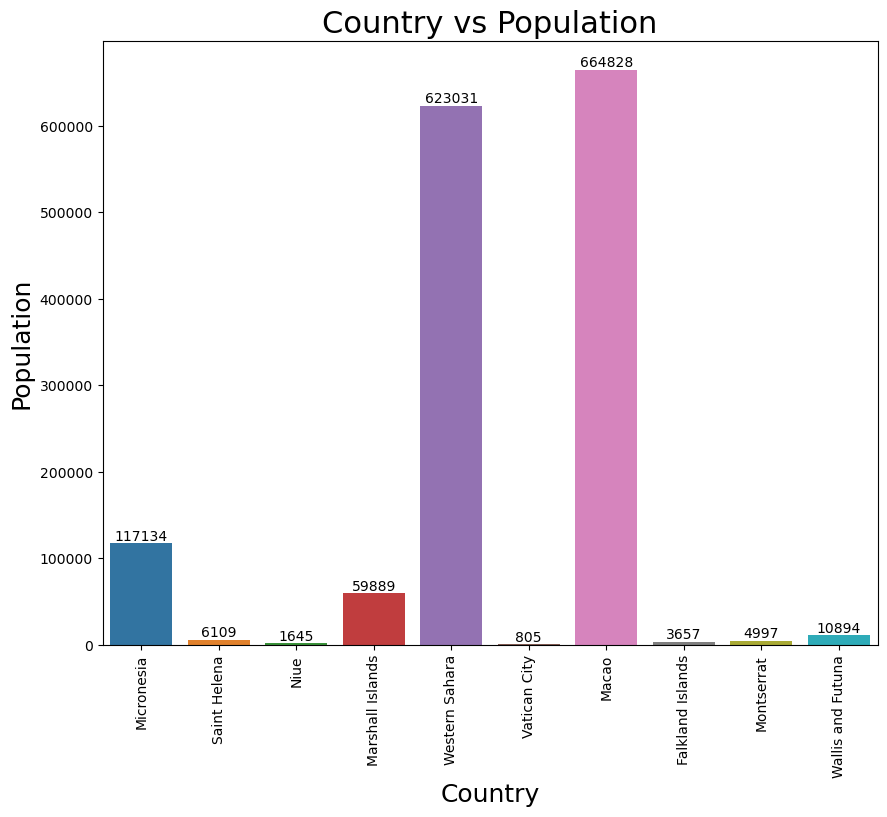

In [47]:
plt.figure(figsize=(10,8),dpi=100)
ax=sns.barplot(low_case.Country,low_case.Population)
plt.xticks(rotation=90)
plt.xlabel("Country",fontsize=18)
plt.ylabel("Population",fontsize=18)
plt.title("Country vs Population",fontsize=22)
for i in ax.containers:
    ax.bar_label(i)
plt.show()


/Users/sakshiashutosh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


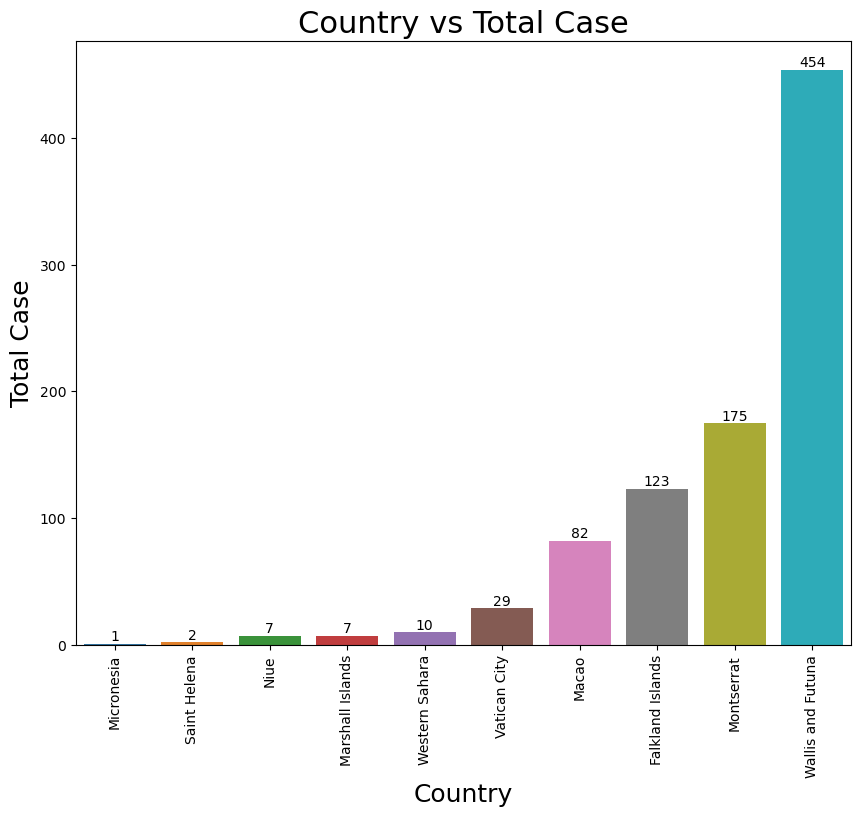

In [48]:
plt.figure(figsize=(10,8),dpi=100)
ax=sns.barplot(low_case.Country,low_case.total_case)
plt.xticks(rotation=90)
plt.xlabel("Country",fontsize=18)
plt.ylabel("Total Case",fontsize=18)
plt.title("Country vs Total Case",fontsize=22)
for i in ax.containers:
    ax.bar_label(i)
plt.show()

/Users/sakshiashutosh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


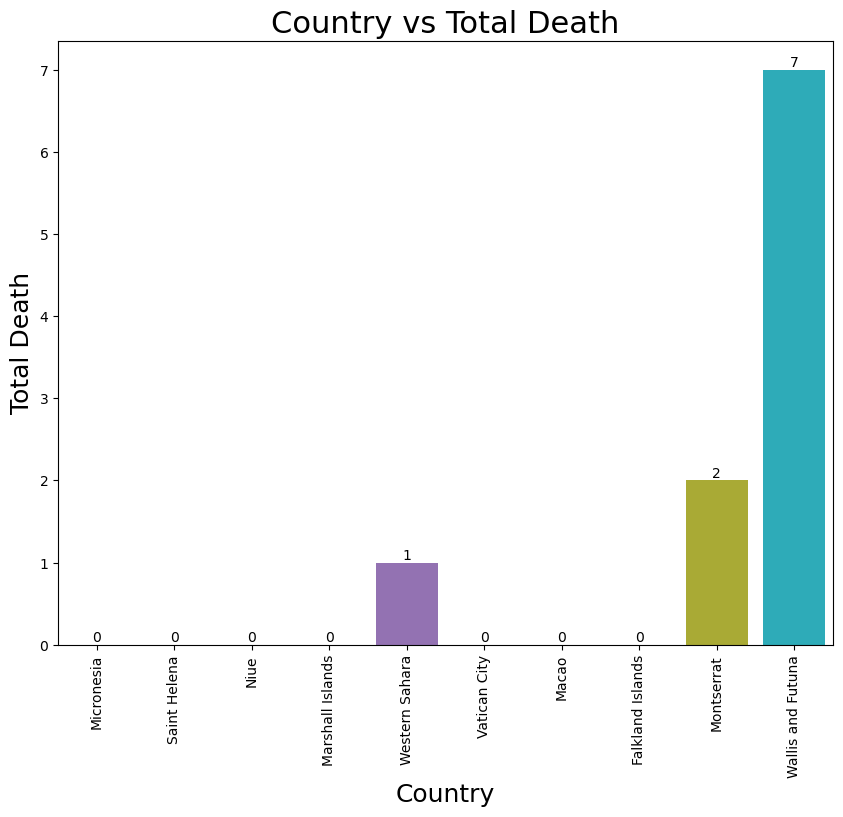

In [52]:
plt.figure(figsize=(10,8),dpi=100)
ax=sns.barplot(low_case.Country,low_case.total_deaths)
plt.xticks(rotation=90)
plt.xlabel("Country",fontsize=18)
plt.ylabel("Total Death",fontsize=18)
plt.title("Country vs Total Death",fontsize=22)
for i in ax.containers:
    ax.bar_label(i)
plt.show()

/Users/sakshiashutosh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


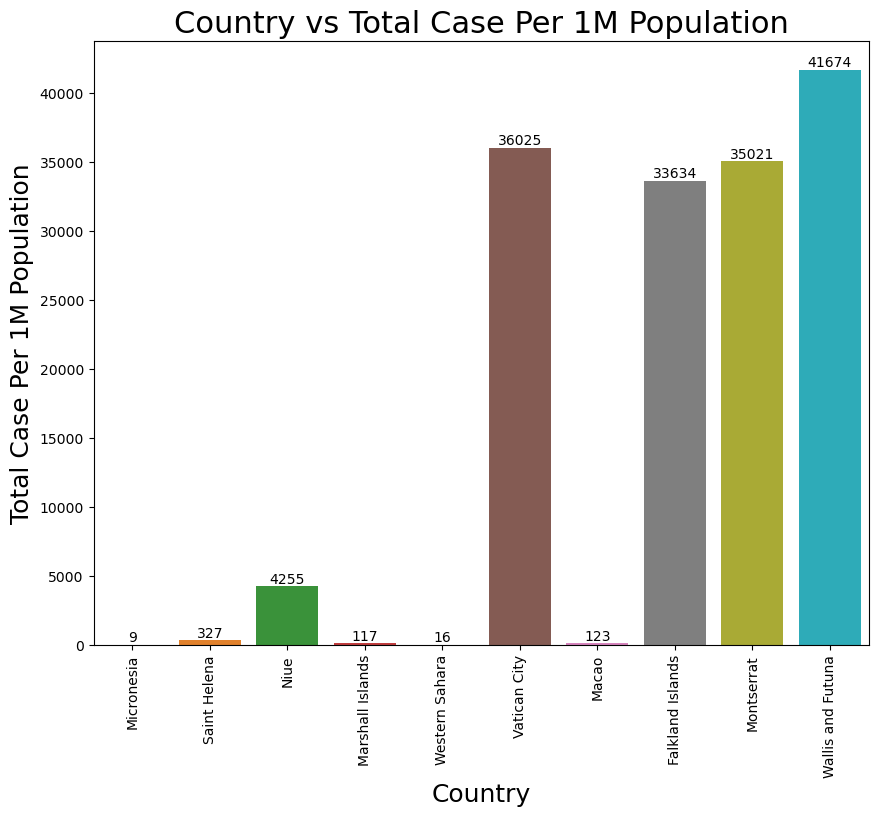

In [54]:
plt.figure(figsize=(10,8),dpi=100)
ax=sns.barplot(low_case.Country,low_case.total_case_per_1M_pop)
plt.xticks(rotation=90)
plt.xlabel("Country",fontsize=18)
plt.ylabel("Total Case Per 1M Population",fontsize=18)
plt.title("Country vs Total Case Per 1M Population",fontsize=22)
for i in ax.containers:
    ax.bar_label(i)
plt.show()

/Users/sakshiashutosh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


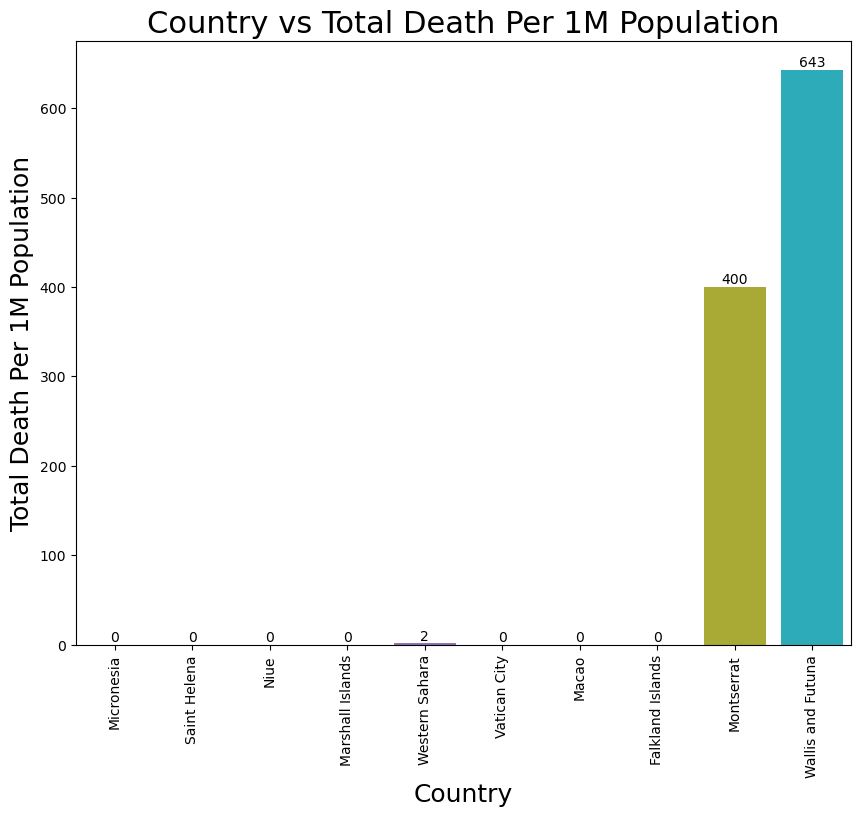

In [55]:
plt.figure(figsize=(10,8),dpi=100)
ax=sns.barplot(low_case.Country,low_case.total_death_per_1M_pop)
plt.xticks(rotation=90)
plt.xlabel("Country",fontsize=18)
plt.ylabel("Total Death Per 1M Population",fontsize=18)
plt.title("Country vs Total Death Per 1M Population",fontsize=22)
for i in ax.containers:
    ax.bar_label(i)
plt.show()

/Users/sakshiashutosh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


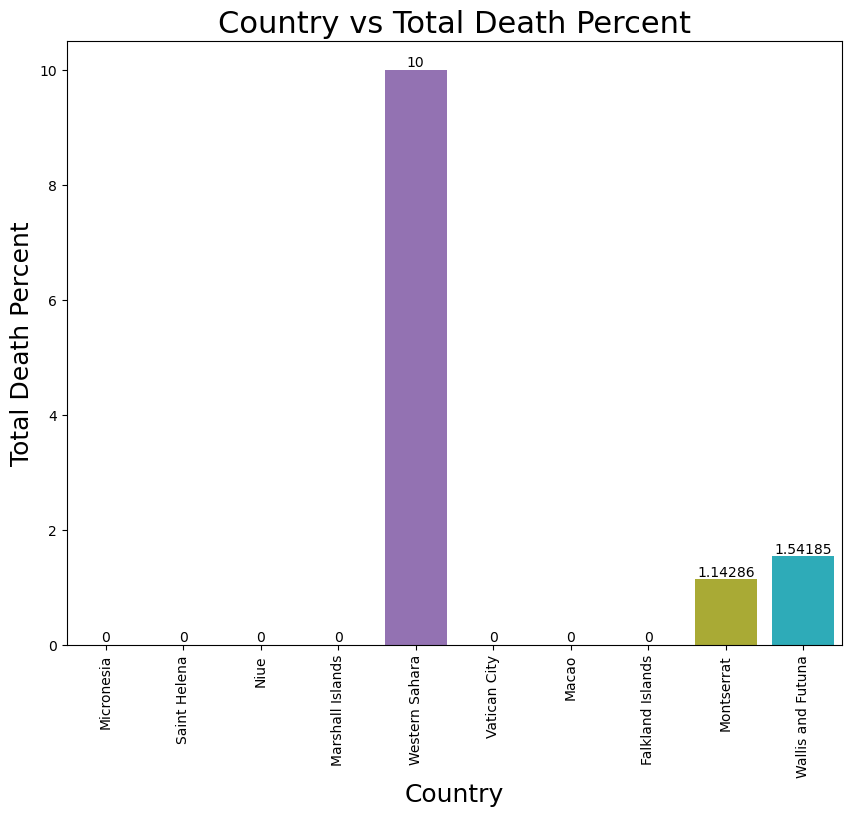

In [56]:
plt.figure(figsize=(10,8),dpi=100)
ax=sns.barplot(low_case.Country,low_case.death_percent)
plt.xticks(rotation=90)
plt.xlabel("Country",fontsize=18)
plt.ylabel("Total Death Percent",fontsize=18)
plt.title("Country vs Total Death Percent",fontsize=22)
for i in ax.containers:
    ax.bar_label(i)
plt.show()

In [100]:
data.total_case.sort_values(ascending =True).tail(10)

167    13874216
99     14846514
207    14894731
165    17896866
211    21216874
76     21646375
70     25997852
26     29999816
92     43029044
214    81839052
Name: total_case, dtype: int64

In [101]:
high_case=data.loc[[167,99,207,165,211,76,70,26,92,214]]

In [102]:
high_case

,Country,other_names,country_code,Population,Continent,total_case,total_deaths,total_case_per_1M_pop,total_death_per_1M_pop,death_percent
167,S. Korea,Republic of Korea,KOR,51346429,Asia,13874216,17235,270208,336,0.124223
99,Italy,Italy,ITA,60306185,Europe,14846514,159784,246186,2650,1.076239
207,Turkey,Turkey,TUR,85927644,Asia,14894731,98157,173340,1142,0.659005
165,Russia,Russian Federation,RUS,146044010,Europe,17896866,369708,122544,2531,2.065770
211,UK,United Kingdom of Great Britain and Northern I...,GBR,68510300,Europe,21216874,165570,309689,2417,0.780369
76,Germany,Germany,DEU,84252947,Europe,21646375,130563,256921,1550,0.603163
70,France,France,FRA,65526369,Europe,25997852,142506,396754,2175,0.548145
26,Brazil,Brazil,BRA,215204501,Latin America and the Caribbean,29999816,660269,139401,3068,2.200910
92,India,India,IND,1403754381,Asia,43029044,521388,30653,371,1.211712
214,USA,United States of America,USA,334400597,Northern America,81839052,1008222,244734,3015,1.231957


/Users/sakshiashutosh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


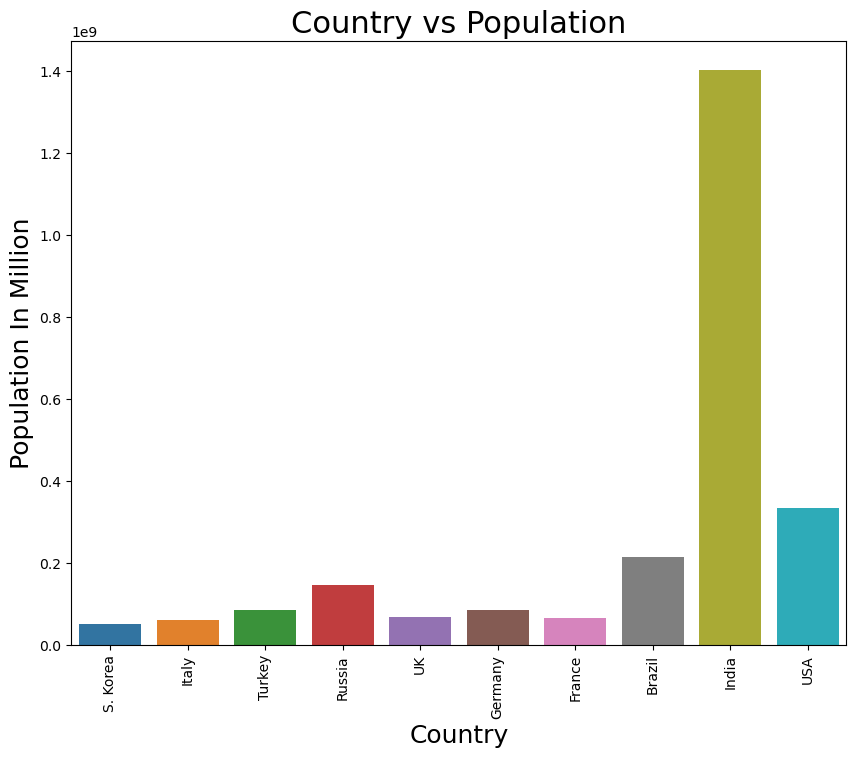

In [105]:
plt.figure(figsize=(10,8),dpi=100)
ax=sns.barplot(high_case.Country,high_case.Population)
plt.xticks(rotation=90)
plt.xlabel("Country",fontsize=18)
plt.ylabel("Population In Million",fontsize=18)
plt.title("Country vs Population",fontsize=22)
plt.show()


/Users/sakshiashutosh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


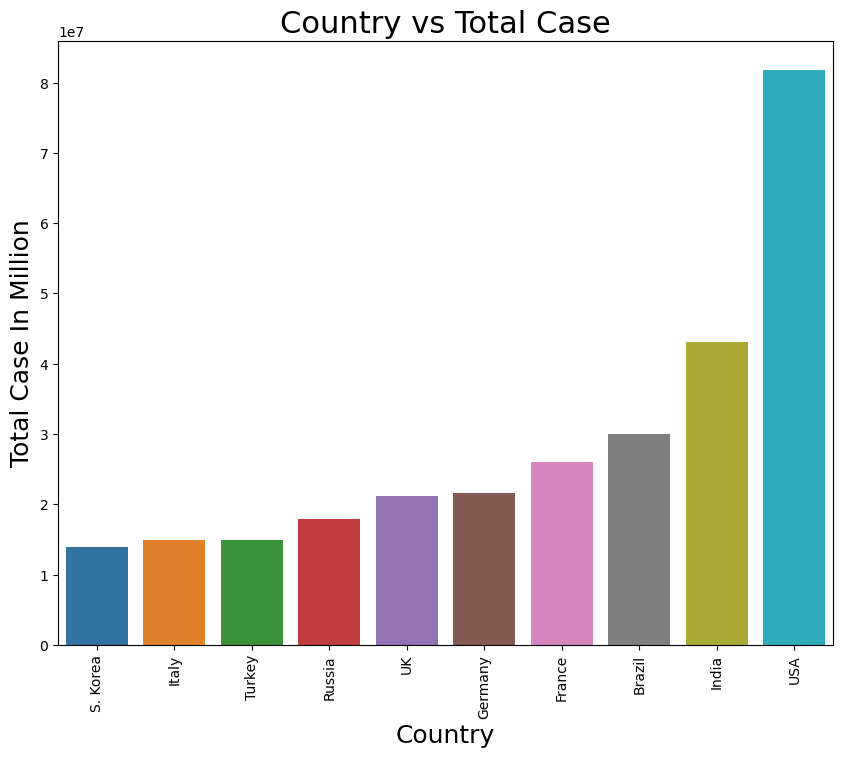

In [108]:
plt.figure(figsize=(10,8),dpi=100)
ax=sns.barplot(high_case.Country,high_case.total_case)
plt.xticks(rotation=90)
plt.xlabel("Country",fontsize=18)
plt.ylabel("Total Case In Million",fontsize=18)
plt.title("Country vs Total Case",fontsize=22)
plt.show()

/Users/sakshiashutosh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


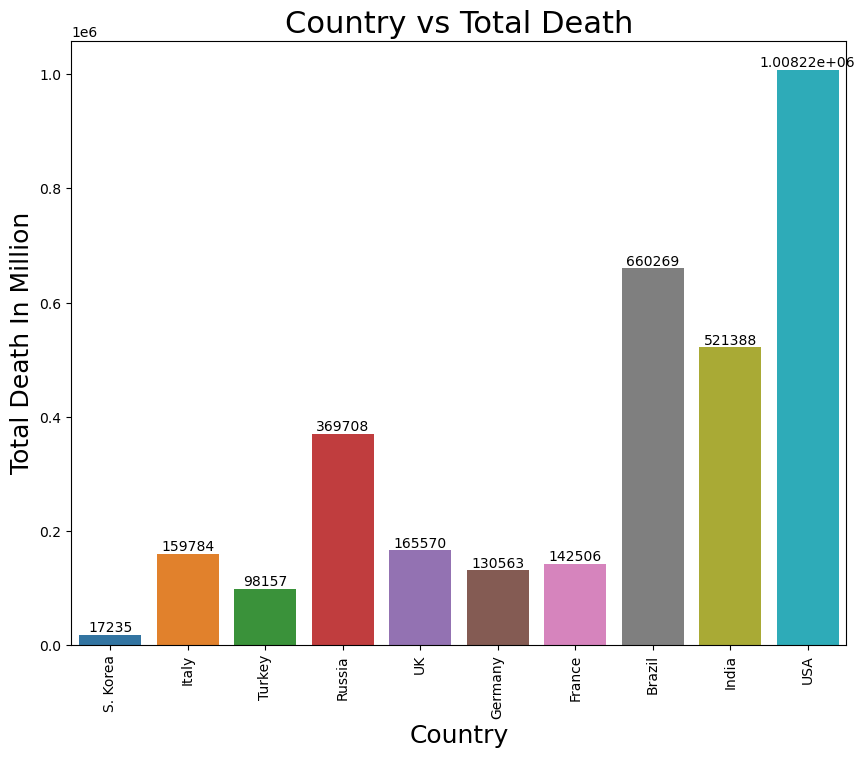

In [110]:
plt.figure(figsize=(10,8),dpi=100)
ax=sns.barplot(high_case.Country,high_case.total_deaths)
plt.xticks(rotation=90)
plt.xlabel("Country",fontsize=18)
plt.ylabel("Total Death In Million",fontsize=18)
plt.title("Country vs Total Death",fontsize=22)
for i in ax.containers:
    ax.bar_label(i)
plt.show()

/Users/sakshiashutosh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


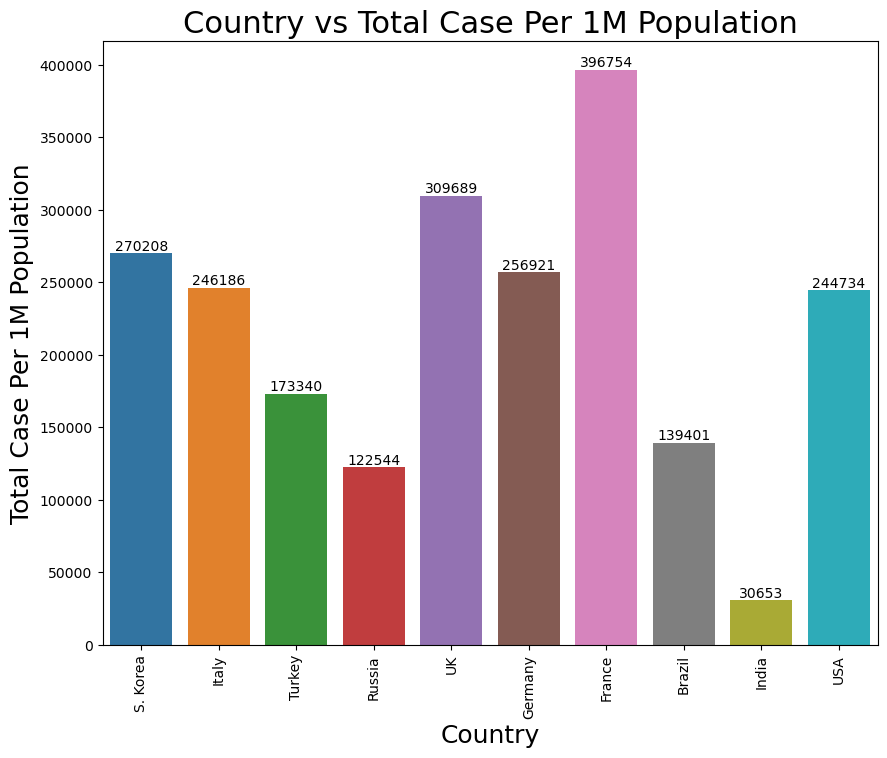

In [111]:
plt.figure(figsize=(10,8),dpi=100)
ax=sns.barplot(high_case.Country,high_case.total_case_per_1M_pop)
plt.xticks(rotation=90)
plt.xlabel("Country",fontsize=18)
plt.ylabel("Total Case Per 1M Population",fontsize=18)
plt.title("Country vs Total Case Per 1M Population",fontsize=22)
for i in ax.containers:
    ax.bar_label(i)
plt.show()

/Users/sakshiashutosh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


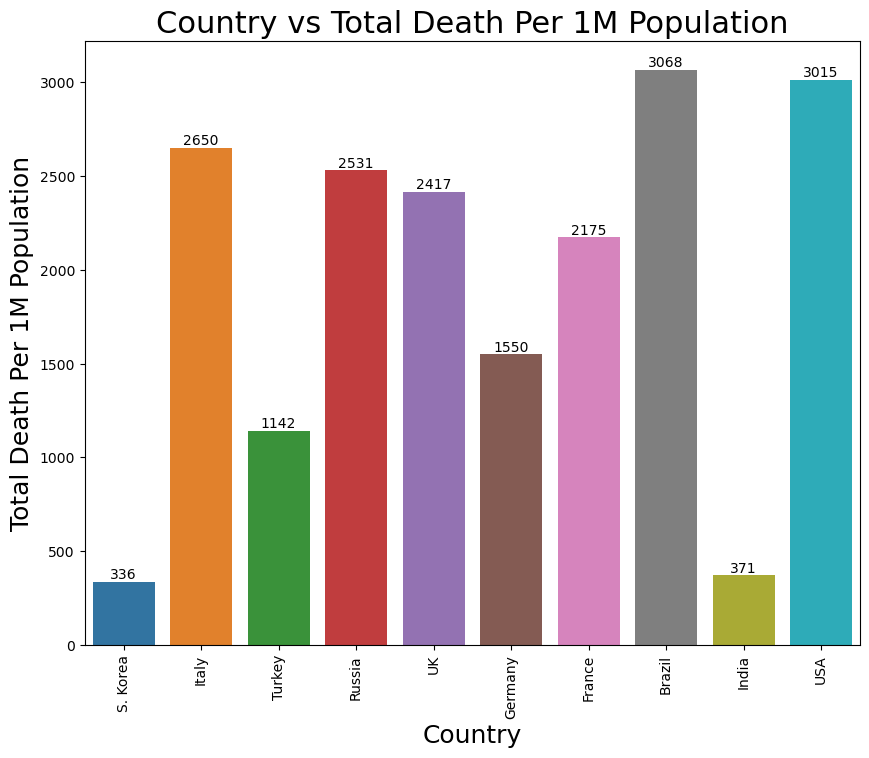

In [112]:
plt.figure(figsize=(10,8),dpi=100)
ax=sns.barplot(high_case.Country,high_case.total_death_per_1M_pop)
plt.xticks(rotation=90)
plt.xlabel("Country",fontsize=18)
plt.ylabel("Total Death Per 1M Population",fontsize=18)
plt.title("Country vs Total Death Per 1M Population",fontsize=22)
for i in ax.containers:
    ax.bar_label(i)
plt.show()

/Users/sakshiashutosh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


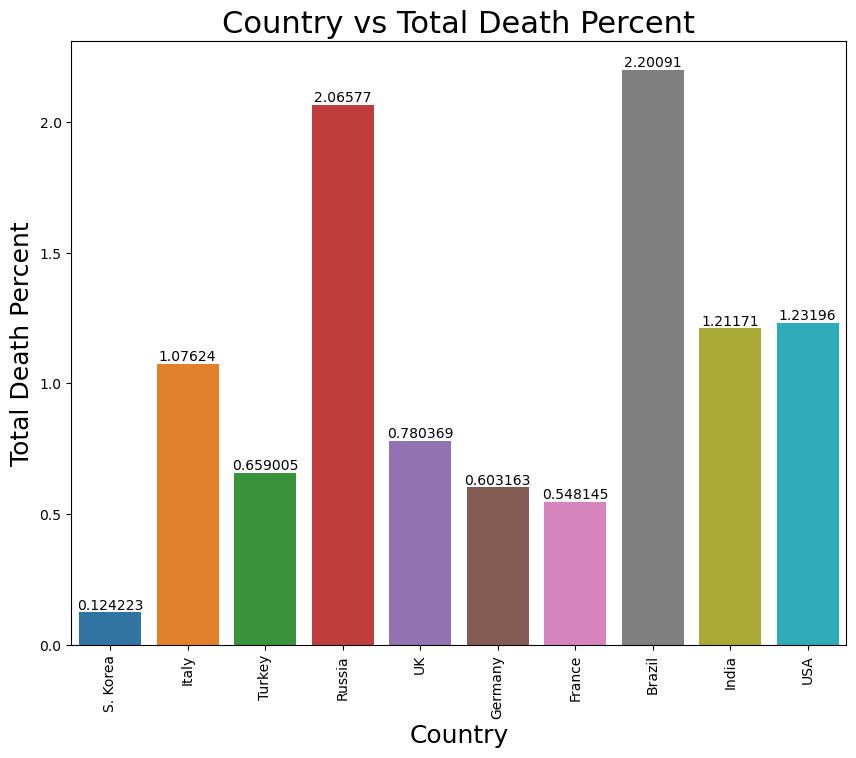

In [113]:
plt.figure(figsize=(10,8),dpi=100)
ax=sns.barplot(high_case.Country,high_case.death_percent)
plt.xticks(rotation=90)
plt.xlabel("Country",fontsize=18)
plt.ylabel("Total Death Percent",fontsize=18)
plt.title("Country vs Total Death Percent",fontsize=22)
for i in ax.containers:
    ax.bar_label(i)
plt.show()

## Continent vs Total Cases

In [67]:
data.groupby("Continent").total_case.sum()

Continent
Africa                              11764207
Asia                               140957179
Europe                             180332483
Latin America and the Caribbean     67509231
Northern America                    85364770
Oceania                              5647957
Name: total_case, dtype: int64

Text(0.5, 1.0, 'Continent vs Total Case')

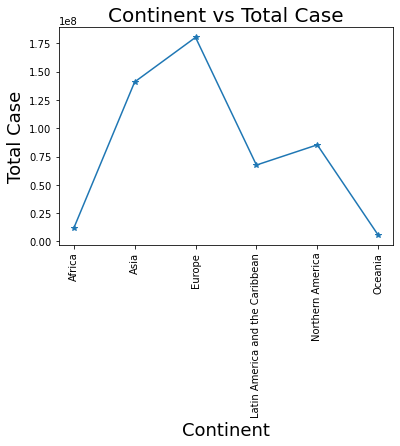

In [79]:
plt.plot(data.groupby("Continent").total_case.sum(),marker='*')
plt.xticks(rotation=90)
plt.xlabel("Continent",fontsize=18)
plt.ylabel("Total Case",fontsize=18)
plt.title("Continent vs Total Case",fontsize=20)

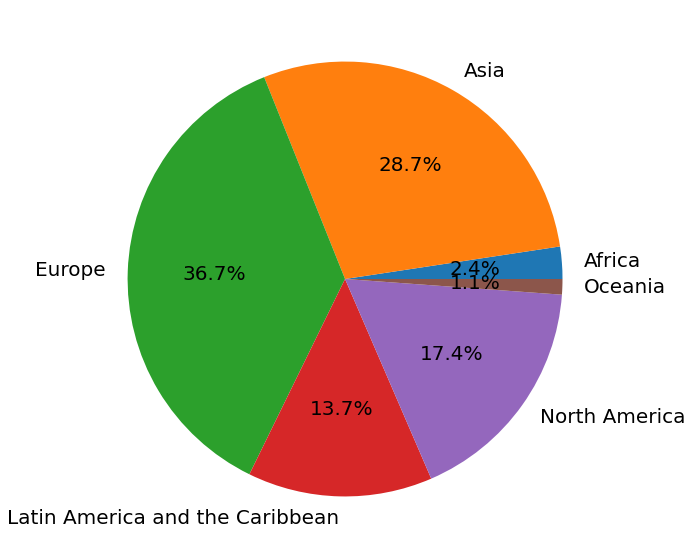

In [114]:
plt.figure(figsize=(12,10))
continent=data.groupby("Continent").total_case.sum()
conti_labels=['Africa','Asia','Europe','Latin America and the Caribbean','North America','Oceania']
plt.pie(continent,labels=conti_labels,autopct='%1.1f%%',textprops={'fontsize':20,'color':'black'})
plt.show()

## Country vs Total Cases

### For Minimum Number Of Case :

In [82]:
data.total_case_per_1M_pop.sort_values(ascending=True).head(10)

131      9
221     16
42     108
125    117
118    123
168    327
146    342
222    381
39     424
200    539
Name: total_case_per_1M_pop, dtype: int64

In [84]:
low_case_per_1M=data.loc[[131,221,42,125,118,168,146,222,39,200]]

In [85]:
low_case_per_1M

,Country,other_names,country_code,Population,Continent,total_case,total_deaths,total_case_per_1M_pop,total_death_per_1M_pop,death_percent
131,Micronesia,Micronesia (Federated States of),FSM,117134,Oceania,1,0,9,0,0.000000
221,Western Sahara,Western Sahara,ESHÂ,623031,Africa,10,1,16,2,10.000000
42,China,China,CHN,1439323776,Asia,154738,4638,108,3,2.997325
125,Marshall Islands,Marshall Islands,MHL,59889,Oceania,7,0,117,0,0.000000
118,Macao,"China, Macao Special Administrative Region",MAC,664828,Asia,82,0,123,0,0.000000
168,Saint Helena,Saint Helena,SHN,6109,Africa,2,0,327,0,0.000000
146,Niger,Niger,NER,25738714,Africa,8811,308,342,12,3.495630
222,Yemen,Yemen,YEM,30975258,Asia,11806,2143,381,69,18.151787
39,Chad,Chad,TCD,17250246,Africa,7308,191,424,11,2.613574
200,Tanzania,United Republic of Tanzania,TZA,62710097,Africa,33815,800,539,13,2.365814


/Users/sakshiashutosh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


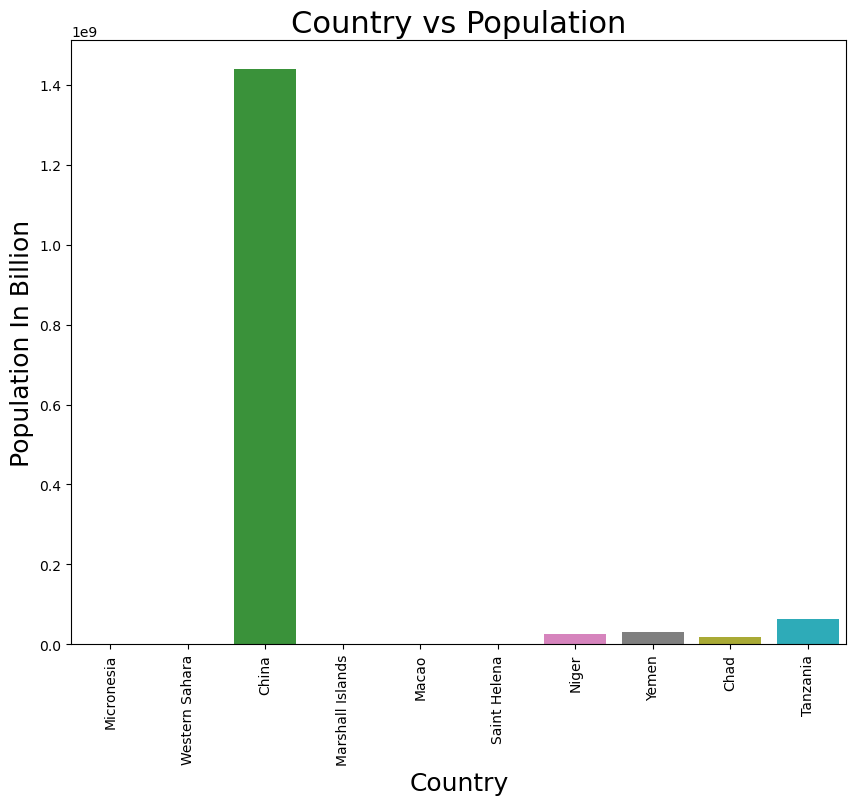

In [88]:
plt.figure(figsize=(10,8),dpi=100)
ax=sns.barplot(low_case_per_1M.Country,low_case_per_1M.Population)
plt.xticks(rotation=90)
plt.xlabel("Country",fontsize=18)
plt.ylabel("Population In Billion",fontsize=18)
plt.title("Country vs Population",fontsize=22)
plt.show()

/Users/sakshiashutosh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


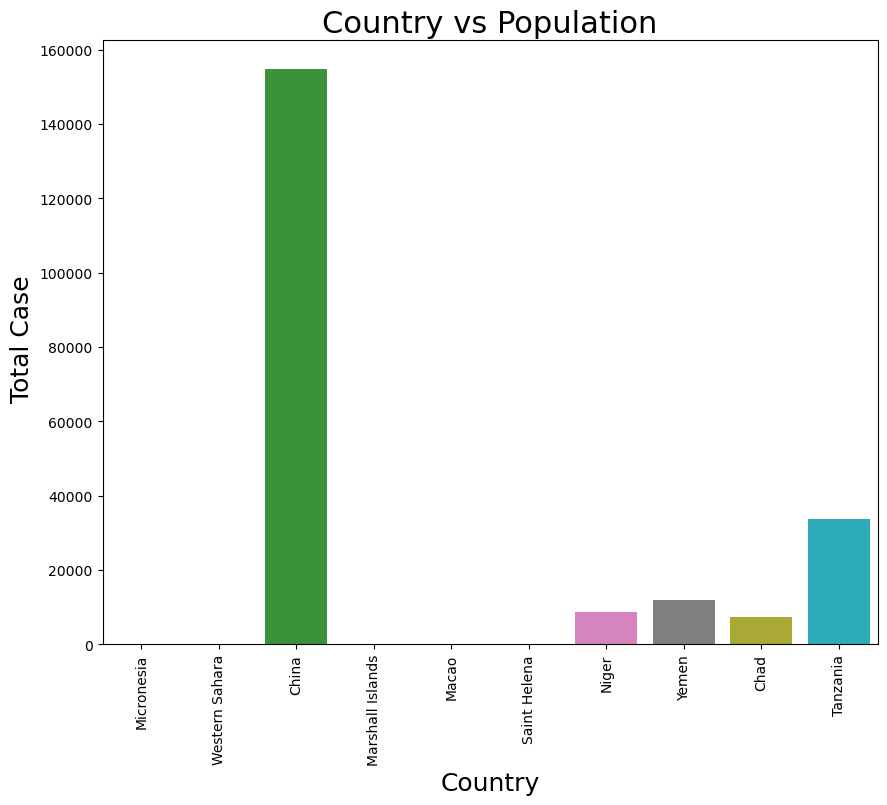

In [89]:
plt.figure(figsize=(10,8),dpi=100)
ax=sns.barplot(low_case_per_1M.Country,low_case_per_1M.total_case)
plt.xticks(rotation=90)
plt.xlabel("Country",fontsize=18)
plt.ylabel(" Total Case",fontsize=18)
plt.title("Country vs Population",fontsize=22)
plt.show()

/Users/sakshiashutosh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


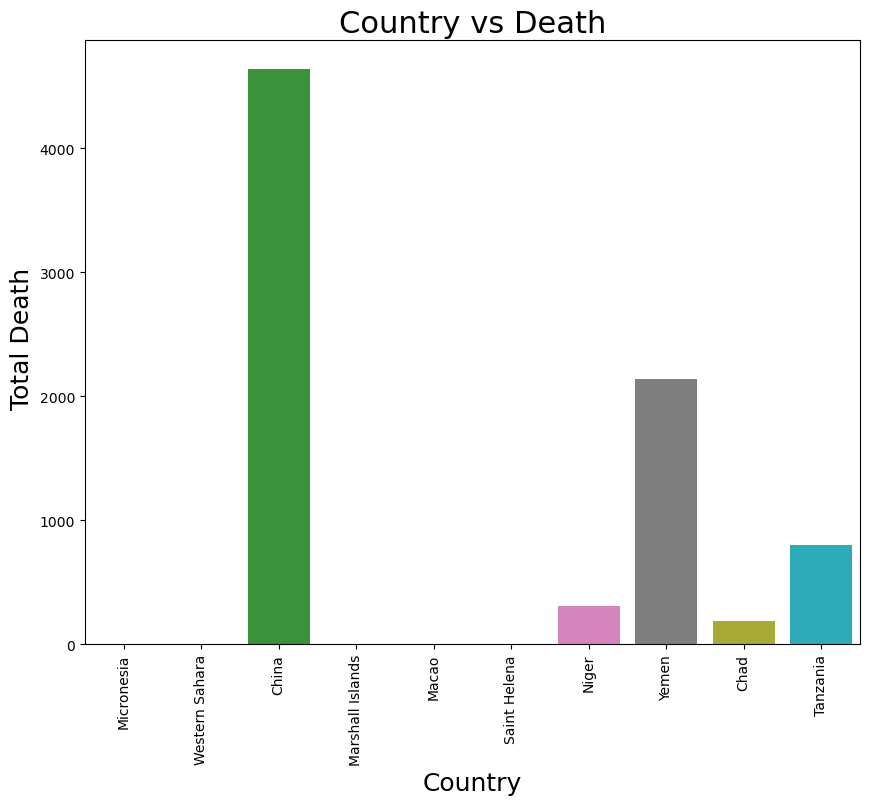

In [91]:
plt.figure(figsize=(10,8),dpi=100)
ax=sns.barplot(low_case_per_1M.Country,low_case_per_1M.total_deaths)
plt.xticks(rotation=90)
plt.xlabel("Country",fontsize=18)
plt.ylabel(" Total Death",fontsize=18)
plt.title("Country vs Death",fontsize=22)
plt.show()

### For Maximum Number Of Cases :

In [92]:
data.total_case_per_1M_pop.sort_values(ascending=True).tail(10)

115    428732
110    433873
174    445766
142    459775
184    468344
53     500939
78     504232
3      516565
91     526860
66     696044
Name: total_case_per_1M_pop, dtype: int64

In [93]:
high_case_per_1M=data.loc[[115,110,174,142,184,53,78,3,91,66]]

In [94]:
high_case_per_1M

,Country,other_names,country_code,Population,Continent,total_case,total_deaths,total_case_per_1M_pop,total_death_per_1M_pop,death_percent
115,Liechtenstein,Liechtenstein,LIE,38320,Europe,16429,84,428732,2192,0.511291
110,Latvia,Latvia,LVA,1849698,Europe,802534,5643,433873,3051,0.703148
174,San Marino,San Marino,SMR,34056,Europe,15181,113,445766,3318,0.744351
142,Netherlands,Netherlands,NLD,17201245,Europe,7908701,22016,459775,1280,0.278377
184,Slovenia,Slovenia,SVN,2079438,Europe,973892,6501,468344,3126,0.667528
53,Denmark,Denmark,DNK,5827911,Europe,2919428,5762,500939,989,0.197367
78,Gibraltar,Gibraltar,GIB,33673,Europe,16979,101,504232,2999,0.594852
3,Andorra,Andorra,AND,77481,Europe,40024,153,516565,1975,0.382271
91,Iceland,Iceland,ISL,345120,Europe,181830,101,526860,293,0.055546
66,Faeroe Islands,Faeroe Islands,FRO,49188,Europe,34237,28,696044,569,0.081783


/Users/sakshiashutosh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


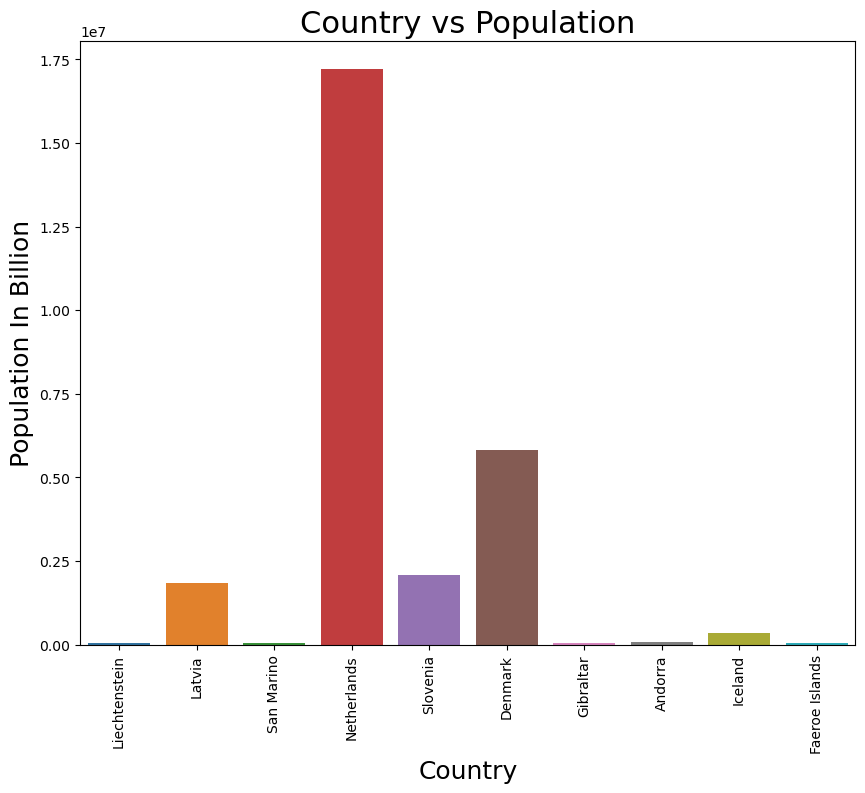

In [95]:
plt.figure(figsize=(10,8),dpi=100)
ax=sns.barplot(high_case_per_1M.Country,high_case_per_1M.Population)
plt.xticks(rotation=90)
plt.xlabel("Country",fontsize=18)
plt.ylabel("Population In Billion",fontsize=18)
plt.title("Country vs Population",fontsize=22)
plt.show()

/Users/sakshiashutosh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


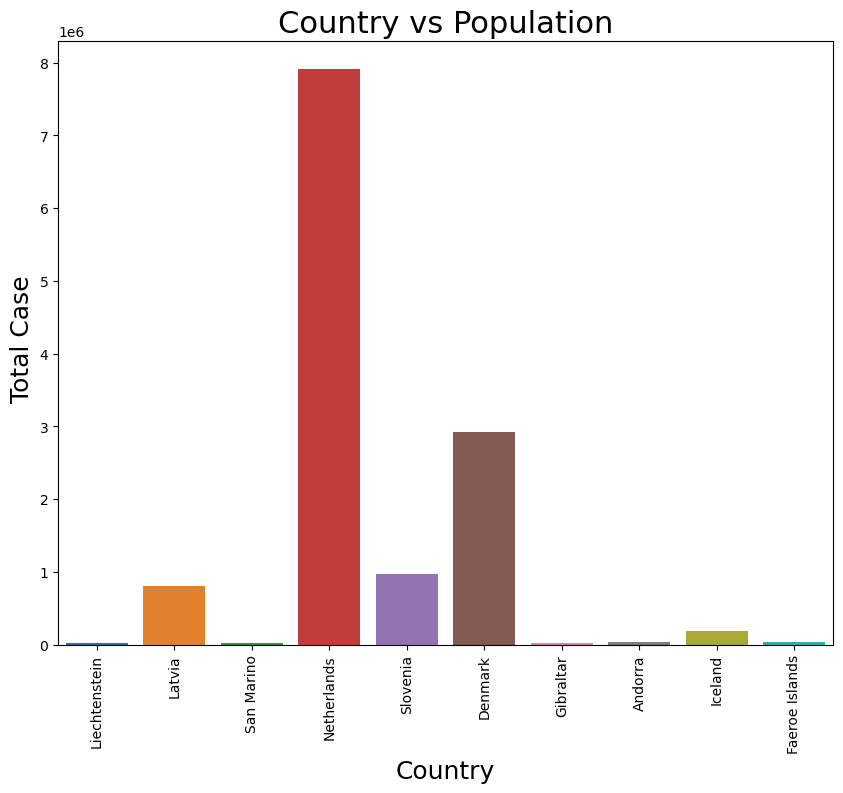

In [96]:
plt.figure(figsize=(10,8),dpi=100)
ax=sns.barplot(high_case_per_1M.Country,high_case_per_1M.total_case)
plt.xticks(rotation=90)
plt.xlabel("Country",fontsize=18)
plt.ylabel(" Total Case",fontsize=18)
plt.title("Country vs Population",fontsize=22)
plt.show()

/Users/sakshiashutosh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


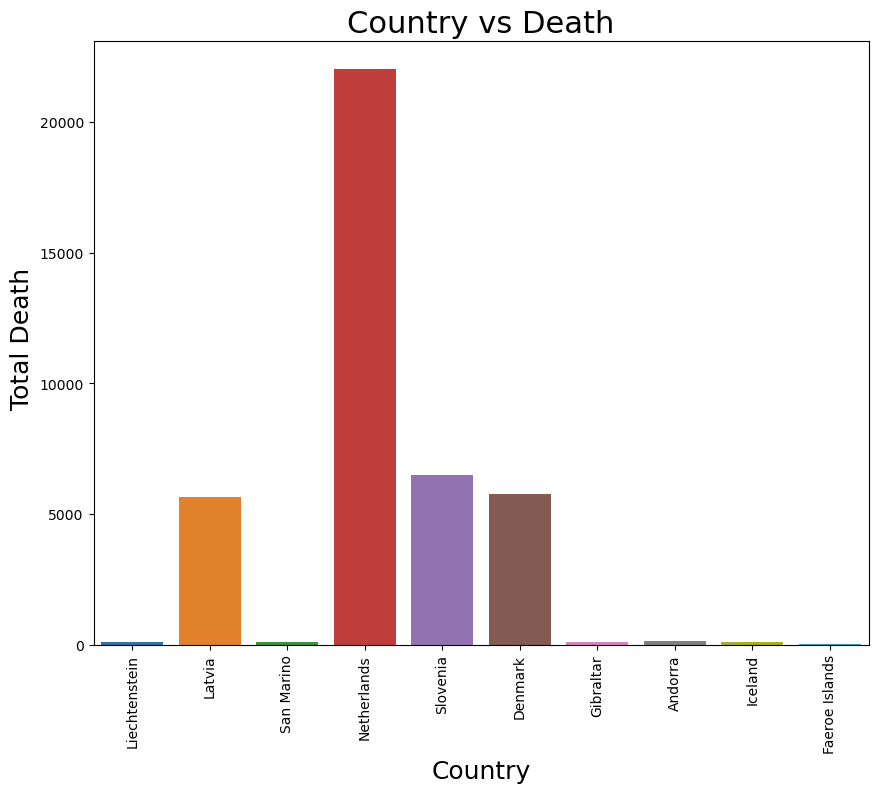

In [97]:
plt.figure(figsize=(10,8),dpi=100)
ax=sns.barplot(high_case_per_1M.Country,high_case_per_1M.total_deaths)
plt.xticks(rotation=90)
plt.xlabel("Country",fontsize=18)
plt.ylabel(" Total Death",fontsize=18)
plt.title("Country vs Death",fontsize=22)
plt.show()

### Primary Symptoms  of Covid -19

* Fever, dizziness, breathlessness, headache, dry cough ( eventually result in phlegm) and in a few cases loss in smell and taste. A few cases have also reported diarrhoea and fatigue.


## Be at home !  
## Be safe !!
### Thank you !!!